In [17]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from umap import UMAP
import warnings
import random
warnings.filterwarnings("ignore")

random.seed(1000)


path = "/Users/hanfeizi/Downloads"
file_name = "champions_group_data.csv"
fp = f"{path}/champions_group_data.csv"

df = pd.read_csv(f"{path}/{file_name}")

print("Path to dataset files:", path)

Path to dataset files: /Users/hanfeizi/Downloads


In [41]:
df = pd.read_csv(fp, sep=",", engine="python", encoding="utf-8-sig")
print(df.shape)
df.head()

(8559, 72)


,DUNS Number,Company Sites,Website,Address Line 1,City,State,State Or Province Abbreviation,Postal Code,Country,Phone Number,Region,Entity Type,Ownership Type,Employees Single Site,Employees Total,Revenue (USD),SIC Code,SIC Description,8-Digit SIC Code,8-Digit SIC Description,NAICS Code,NAICS Description,NACE Rev 2 Code,NACE Rev 2 Description,Ticker,Year Found,Lattitude,Longitude,Parent Company,Parent Street Address,Parents City,Parent State/Province,Parent State/Province Abbreviation,Parent Postal Code,Parent Country/Region,Global Ultimate Company,Global Ultimate Street Address,Global Ultimate City Name,Global Ultimate State/Province,Ultimate State/Province Abbreviation,Global Ultimate Postal Code,Global Ultimate Country Name,Domestic Ultimate Company,Domestic Ultimate Street Address,Domestic Ultimate City Name,Domestic Ultimate State/Province Name,Domestic Ultimate State Abbreviation,Domestic Ultimate Postal Code,Registration Number,Registration Number Type,Company Description,Company Status (Active/Inactive),Legal Status,Corporate Family Members,Is Headquarters,Is Domestic Ultimate,Market Value (USD),Franchise Status,Manufacturing Status,Fiscal Year End,ANZSIC Code,ANZSIC Description,ISIC Rev 4 Code,ISIC Rev 4 Description,IT Budget,IT spend,No. of PC,No. of Desktops,No. of Laptops,No. of Routers,No. of Servers,No. of Storage Devices
0,639677726,"Zyf Lopsking Material Technology Co., Ltd. No....",NaN,"No.2777 Taidong Road, Panyang Industrial Park,...",Suzhou,Jiangsu,JS,215000.0,CHINA,NaN,Asia,Branch,Private,1.0,1,0,5051,Metals service center,50510000.0,Metals service centers and offices,423510.0,Metal Service Centers and Other Metal Merchant...,4672.0,Wholesale of metals and metal ores,NaN,2023.0,NaN,NaN,"Zyf Lopsking Material Technology Co., Ltd. ...","No.2777 Taidong Road, Panyang Industrial Park,...",Suzhou,Jiangsu,JS,215143.0,CHINA,"Zyf Lopsking Material Technology Co., Ltd. ...","No.2777 Taidong Road, Panyang Industrial Park,...",Suzhou,Jiangsu,JS,215143,CHINA,"Zyf Lopsking Material Technology Co., Ltd. ...","No.2777 Taidong Road, Panyang Industrial Park,...",Suzhou,Jiangsu,JS,215143.0,91320507MACTALE2,NaN,"Zyf Lopsking Material Technology Co., Ltd. No....",Active,3.0,24,0.0,0.0,0,FALSE,NaN,2031-12-01 00:00:00,3322.0,Metal and Mineral Wholesaling,4662.0,Wholesale of metals and metal ores,0,0,1 to 10,1 to 10,1 to 10,1 to 10,NaN,NaN
1,547756179,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",NaN,"No.306, Building 8, Shuangyushudongli Jia, Hai...",Beijing,Beijing,BJ,100086.0,CHINA,1.082129e+09,Asia,Subsidiary,Private,20.0,20,311166,5651,Ret family clothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,"Zushijie (Beijing) Technology Co., Ltd. ...","1137, Floor 1011, Building 2, No. West 900 Cou...",Beijing,Beijing,BJ,100000.0,CHINA,"Zushijie (Beijing) Technology Co., Ltd. ...","1137, Floor 1011, Building 2, No. West 900 Cou...",Beijing,Beijing,BJ,100000,CHINA,"Zushijie (Beijing) Technology Co., Ltd. ...","1137, Floor 1011, Building 2, No. West 900 Cou...",Beijing,Beijing,BJ,100000.0,110108011316338,NaN,NaN,Active,3.0,2,NaN,NaN,0,NaN,NaN,2031-12-01 00:00:00,NaN,NaN,NaN,NaN,5601,3472,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
2,728834216,Keshan Shengren Potato Industry Processing Co....,NaN,"South of Siduan Road, Xi Street, Keshan Town, ...",Qiqihar,Heilongjiang,HL,161000.0,CHINA,NaN,Asia,Subsidiary,Private,89.0,89,2414036,2037,Mfg frozen fruits/vegetables,20370000.0,Frozen fruits and vegetables,311411.0,"Frozen Fruit, Juice, and Vegetable Manufacturing",NaN,NaN,NaN,2013.0,47.34088,123.96045,"Zuoyuan Group Co., Ltd. ...","No.,4, No.3, Floor 17, No.596, Huangpu Road, D...",Dalian,Liaoning,NaN,116000.0,CHINA,"Zuoyuan Group Co., Ltd. ...","No.,4, No.3, Floor 17, No.596, Huangpu Road, D...",Dalian,Liaoning,NaN,116000,CHINA,"Zuoyuan Group Co., Ltd. ...","No.,4, No.3, Floor 17, No.596, Huangpu Road, D...",Dalian,Liaoning,NaN,116000.0,230229100018306,NaN,Keshan Shengren Potato Industry Processing Co....,Active,3.0,9,NaN,NaN,82

In [42]:
df.shape
df.info()

print("Shape:", df.shape) 
industry_cols = [
    'SIC Code', 'SIC Description',
    'NAICS Code', 'NAICS Description',
    'NACE Rev 2 Code', 'NACE Rev 2 Description',
    'ANZSIC Code', 'ANZSIC Description',
    'ISIC Rev 4 Code', 'ISIC Rev 4 Description'
]

geo_cols = [
    'Country', 'Region',
    'City', 'State', 'State Or Province Abbreviation', 'Postal Code'
]

firm_cols = [
    'Entity Type',
    'Ownership Type',
    'Company Status (Active/Inactive)',
    'Legal Status',
    'Manufacturing Status',
    'Is Headquarters',
    'Is Domestic Ultimate',
    'Company Sites'
]
df[industry_cols + geo_cols + firm_cols].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 72 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   DUNS Number                            8559 non-null   int64  
 1   Company Sites                          8559 non-null   object 
 2   Website                                625 non-null    object 
 3   Address Line 1                         8216 non-null   object 
 4   City                                   8045 non-null   object 
 5   State                                  8044 non-null   object 
 6   State Or Province Abbreviation         7824 non-null   object 
 7   Postal Code                            8062 non-null   float64
 8   Country                                8559 non-null   object 
 9   Phone Number                           1674 non-null   float64
 10  Region                                 8559 non-null   object 
 11  Enti

,SIC Code,SIC Description,NAICS Code,NAICS Description,NACE Rev 2 Code,NACE Rev 2 Description,ANZSIC Code,ANZSIC Description,ISIC Rev 4 Code,ISIC Rev 4 Description,Country,Region,City,State,State Or Province Abbreviation,Postal Code,Entity Type,Ownership Type,Company Status (Active/Inactive),Legal Status,Manufacturing Status,Is Headquarters,Is Domestic Ultimate,Company Sites
0,5051,Metals service center,423510.0,Metal Service Centers and Other Metal Merchant...,4672.0,Wholesale of metals and metal ores,3322.0,Metal and Mineral Wholesaling,4662.0,Wholesale of metals and metal ores,CHINA,Asia,Suzhou,Jiangsu,JS,215000.0,Branch,Private,Active,3.0,NaN,0.0,0.0,"Zyf Lopsking Material Technology Co., Ltd. No...."
1,5651,Ret family clothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHINA,Asia,Beijing,Beijing,BJ,100086.0,Subsidiary,Private,Active,3.0,NaN,NaN,NaN,"Beijing Kaishi Lide Commerce And Trade Co., Lt..."
2,2037,Mfg frozen fruits/vegetables,311411.0,"Frozen Fruit, Juice, and Vegetable Manufacturing",NaN,NaN,NaN,NaN,NaN,NaN,CHINA,Asia,Qiqihar,Heilongjiang,HL,161000.0,Subsidiary,Private,Active,3.0,Yes,NaN,NaN,Keshan Shengren Potato Industry Processing Co....
3,191,General crop farm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHINA,Asia,Jinzhong,Shanxi,SX,30600.0,Parent,Private,Active,3.0,NaN,NaN,NaN,Zuoquan County Yuanfeng Agriculture Technology...
4,6552,Subdivider/developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHINA,Asia,Jinzhong,Shanxi,SX,30600.0,Parent,Private,Active,3.0,NaN,NaN,NaN,Zuoquan County Tianxin Real Estate Development...


In [43]:
df = df[df["Company Status (Active/Inactive)"] == "Active"].copy()
print("After filtering active companies:", df.shape)

After filtering active companies: (8559, 72)


In [ ]:
df_base = df.copy()

df_active = df_base[df_base["Company Status (Active/Inactive)"].astype(str).str.strip() == "Active"].copy()

industry_col = "ISIC Rev 4 Description"
df_industry = df_base[df_base[industry_col].notna()].copy()

df_industry_active = df_active[df_active[industry_col].notna()].copy()

print("df_base:", df_base.shape)
print("df_active:", df_active.shape)
print("df_industry:", df_industry.shape)
print("df_industry_active:", df_industry_active.shape)


df_base: (8559, 72)
df_active: (8559, 72)
df_industry: (1514, 72)
df_industry_active: (1514, 72)


In [ ]:
#industry cleaning
df_industry[industry_col] = (
    df_industry[industry_col]
    .astype("string")
    .str.strip()
)

In [ ]:
#ownertype cleaning
df_active["Ownership_Type_Clean"] = (
    df_active["Ownership Type"]
    .astype("string")
    .str.strip()
    .fillna("Unknown")
)

df_active["Ownership_Type_Clean"].value_counts()

Ownership_Type_Clean
Private           7457
Unknown           1082
Nonprofit            8
Partnership          7
Public Sector        4
Non-Corporates       1
Name: count, dtype: Int64

In [ ]:
#region and country cleaning
for d in [df_active, df_industry]:
    d["Country_Clean"] = (
        d["Global Ultimate Country Name"]
        .astype("string")
        .str.strip()
        .fillna("Unknown")
    )
    d["Region_Clean"] = (
        d["Region"]
        .astype("string")
        .str.strip()
        .fillna("Unknown")
    )

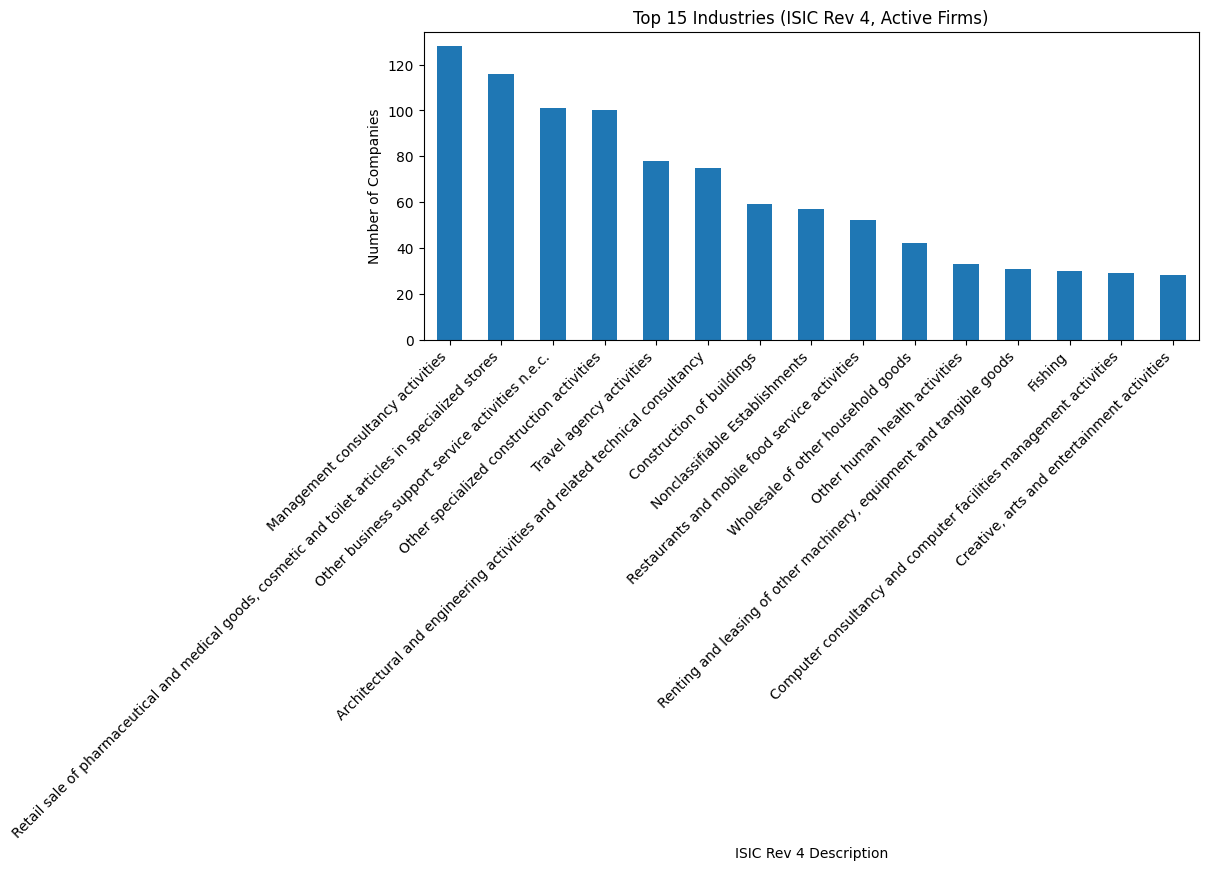

Top 5 industries share: 34.5%
Top 10 industries share: 53.4%


In [ ]:
#industry eda
industry_counts = df_industry[industry_col].value_counts()

plt.figure(figsize=(10,4))
industry_counts.head(15).plot(kind="bar")
plt.title("Top 15 Industries (ISIC Rev 4, Active Firms)")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()
top5_share = industry_counts.head(5).sum() / industry_counts.sum()
top10_share = industry_counts.head(10).sum() / industry_counts.sum()

print(f"Top 5 industries share: {top5_share:.1%}")
print(f"Top 10 industries share: {top10_share:.1%}")

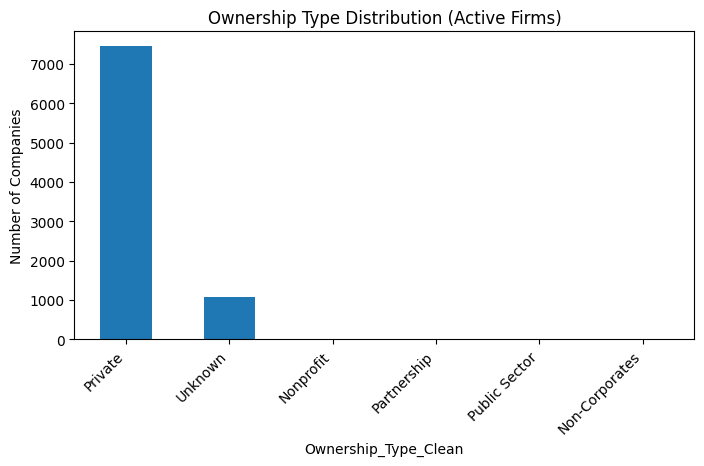

In [72]:
ownership_counts = df_active["Ownership_Type_Clean"].value_counts()

plt.figure(figsize=(8,4))
ownership_counts.plot(kind="bar")
plt.title("Ownership Type Distribution (Active Firms)")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

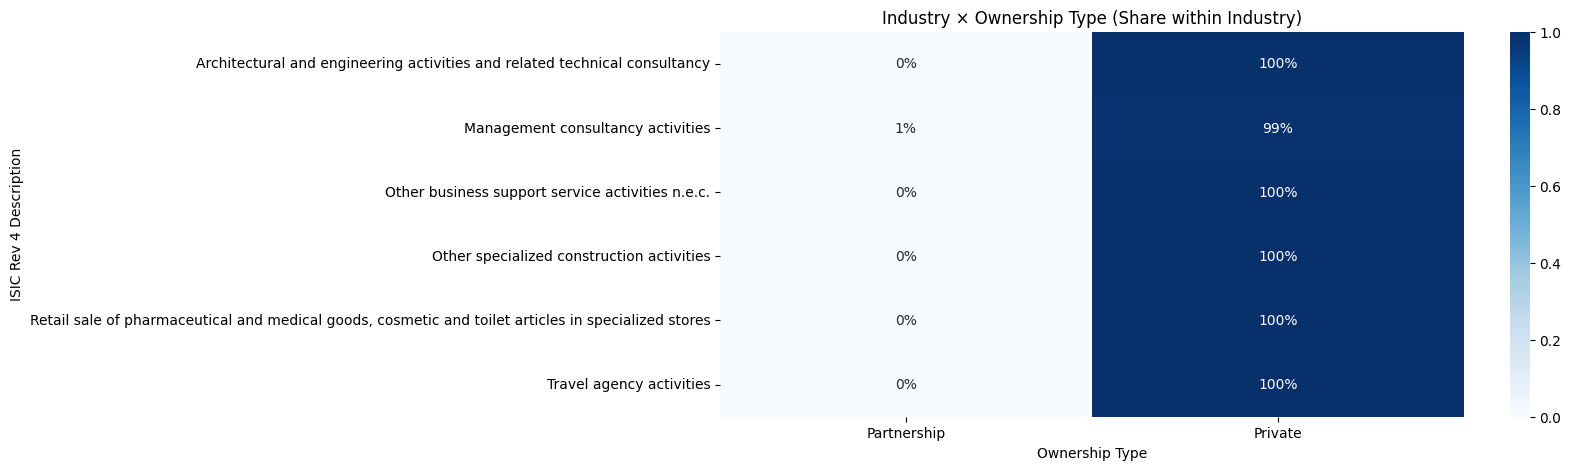

In [74]:
top_industries = industry_counts.head(6).index

industry_ownership = pd.crosstab(
    df_industry[df_industry[industry_col].isin(top_industries)][industry_col],
    df_industry[df_industry[industry_col].isin(top_industries)]["Ownership Type"],
    normalize="index"
)

plt.figure(figsize=(12,5))
sns.heatmap(industry_ownership, cmap="Blues", annot=True, fmt=".0%")
plt.title("Industry × Ownership Type (Share within Industry)")
plt.show()

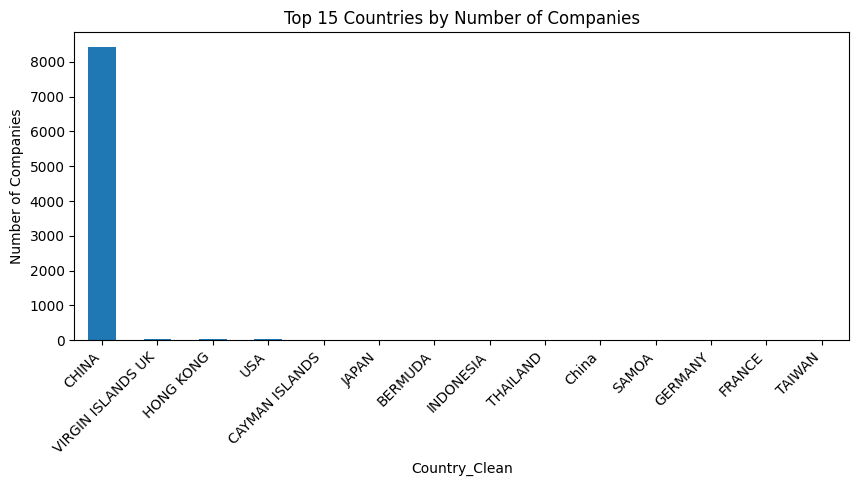

In [75]:
#region eda
country_counts = df_active["Country_Clean"].value_counts().head(15)

plt.figure(figsize=(10,4))
country_counts.plot(kind="bar")
plt.title("Top 15 Countries by Number of Companies")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

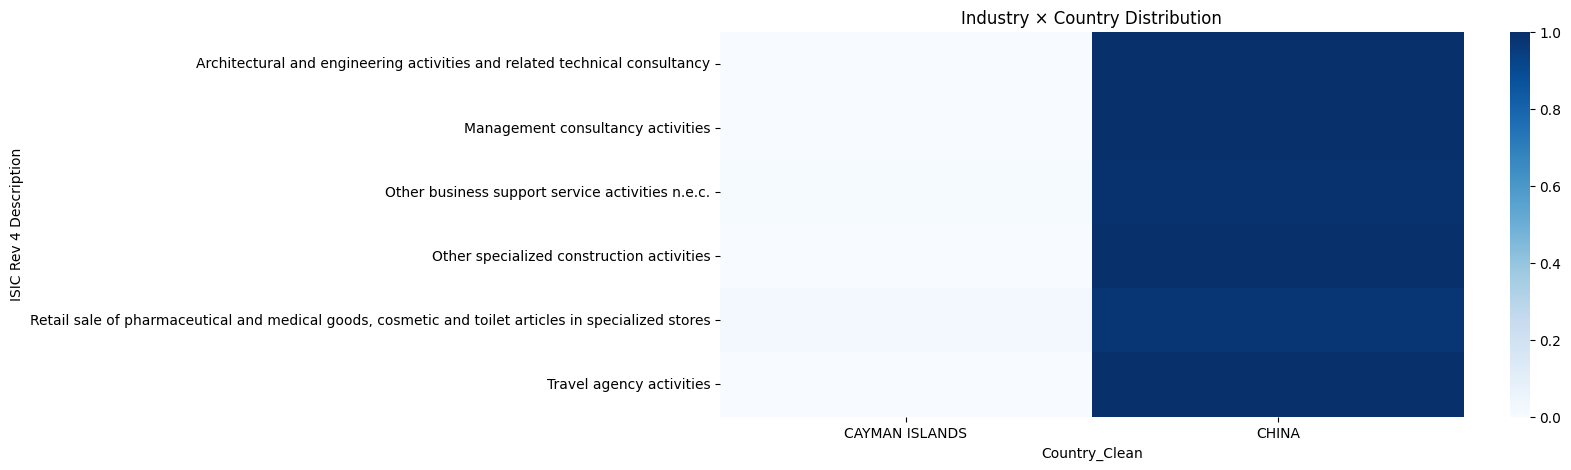

In [76]:
top_countries = df_industry["Country_Clean"].value_counts().head(10).index

industry_country = pd.crosstab(
    df_industry[df_industry[industry_col].isin(top_industries)][industry_col],
    df_industry[df_industry["Country_Clean"].isin(top_countries)]["Country_Clean"],
    normalize="index"
)

plt.figure(figsize=(12,5))
sns.heatmap(industry_country, cmap="Blues")
plt.title("Industry × Country Distribution")
plt.show()

In [77]:
ownership_country = pd.crosstab(
    df_active["Ownership_Type_Clean"],
    df_active["Country_Clean"],
    normalize="columns"
)

ownership_country.head()

Country_Clean,BERMUDA,CAYMAN ISLANDS,CHINA,China,FRANCE,GERMANY,HONG KONG,INDONESIA,JAPAN,SAMOA,TAIWAN,THAILAND,USA,VIRGIN ISLANDS UK
Ownership_Type_Clean,,,,,,,,,,,,,,
Non-Corporates,0.0,0.0,0.000119,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000
Nonprofit,0.0,0.0,0.000830,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.000000,0.000000
Partnership,0.0,0.0,0.000830,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000
Private,1.0,1.0,0.871278,1.0,1.0,1.0,0.8,0.50,0.888889,1.0,1.0,1.0,0.954545,0.828571
Public Sector,0.0,0.0,0.000475,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000
